In [1]:
import pandas as pd
import numpy as np

housing=pd.read_csv('D:\machine learning\programs\ml4_Californian_House\housing.csv')
housing.head() # head() is top 5 rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
housing.info()
# info() : quick Desc of data i.e tot no. of rows and each attribut type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing.describe()
# this shows numerical summary.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


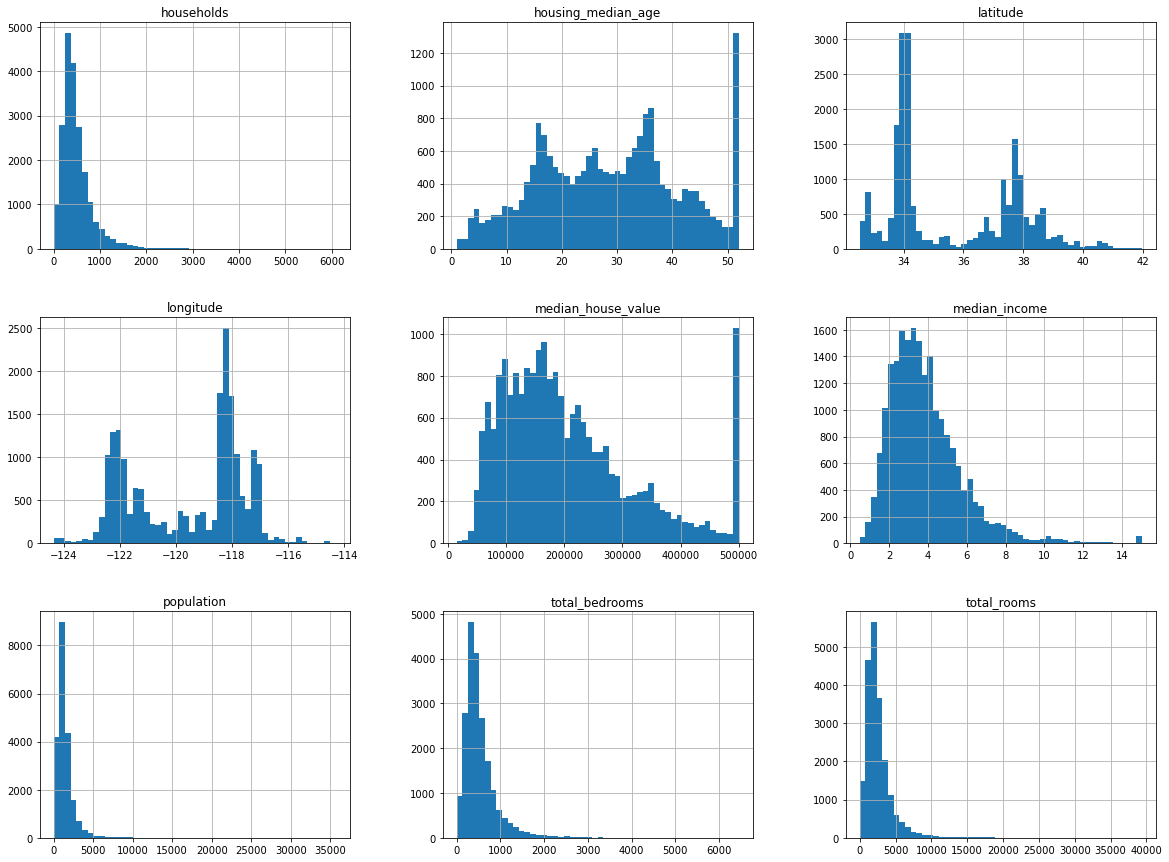

In [4]:
import matplotlib.pyplot as plt

#hist() showsno. of instances that have a given value range
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [5]:
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0,1.5,3.0,4.5,6.0,np.inf],labels=[12,2,3,4,5])
#creating new attribut in DF , which splits the median income into 5 categories

from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

for train_ind,test_ind in split.split(housing , housing["income_cat"]):
    strat_train_set=housing.loc[train_ind]
    strat_test_set=housing.loc[test_ind]
    
# .loc is used to access a group of rows or columms   

strat_train_set.drop(["income_cat"], axis=1, inplace=True)
strat_test_set.drop(["income_cat"], axis=1, inplace=True)

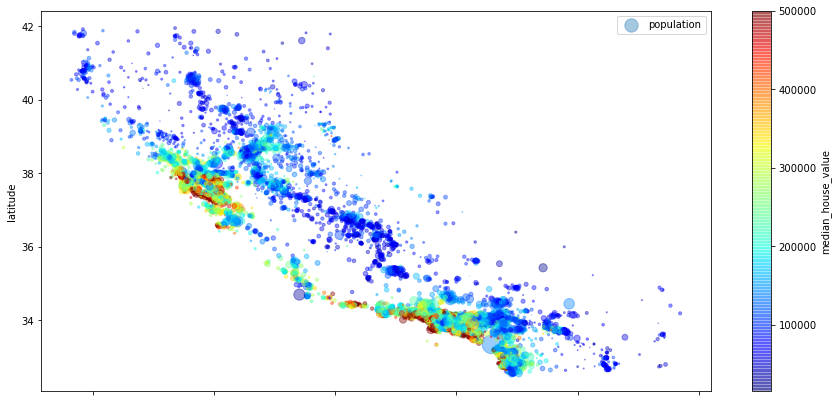

In [6]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            figsize=(15,7))
plt.legend()

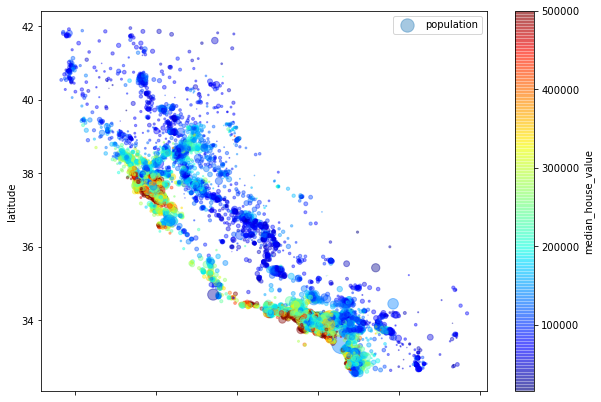

In [7]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,label="population",
             figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
# The radius of Circle in plot rep. population while color rep. price
plt.legend()

In [8]:
#correlation means how a attribute's value correlates with a given Attribut value.

corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685882
total_rooms           0.132008
housing_median_age    0.104495
households            0.065237
total_bedrooms        0.049183
population           -0.025932
longitude            -0.040280
latitude             -0.148757
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BAEC0BEEB0>,
      dtype=object)

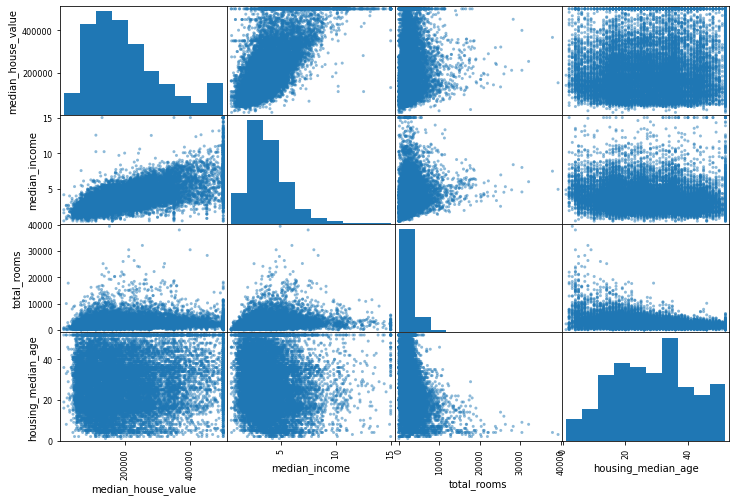

In [9]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income','total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18058,-122.01,37.27,27.0,3340.0,451.0,1220.0,447.0,8.8178,500001.0,<1H OCEAN
11934,-117.41,33.93,35.0,793.0,150.0,669.0,128.0,4.0156,89300.0,INLAND
369,-122.15,37.75,40.0,1445.0,256.0,849.0,255.0,3.8913,126300.0,NEAR BAY


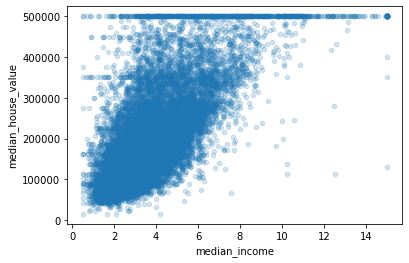

In [10]:
#in the above plots the most linearly correlated is median_house_value to median_income.
#plotting the same

housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.2)
housing.head(3)

In [11]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedroom_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

# <--------------- END OF DATA EXPLORING ------------------->

median_house_value          1.000000
median_income               0.685882
rooms_per_household         0.147670
total_rooms                 0.132008
housing_median_age          0.104495
households                  0.065237
total_bedrooms              0.049183
population                 -0.025932
population_per_household   -0.026699
longitude                  -0.040280
latitude                   -0.148757
bedroom_per_room           -0.259410
Name: median_house_value, dtype: float64

In [12]:
# <----------- Data Preprocessing -------------------->

housing = strat_train_set.drop("median_house_value", axis=1)  # attributes predicting Target value
housing_labels = strat_train_set['median_house_value'].copy() #Target Value

from sklearn.model_selection import train_test_split
train_X,val_X , train_y, val_y = train_test_split(housing, housing_labels,train_size=0.8,test_size=0.2, random_state=0)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
numCols = [cname for cname in housing if cname!="ocean_proximity"]
catCols=['ocean_proximity']
myCols=numCols+catCols
X_train=train_X[myCols].copy()
X_val=val_X[myCols].copy()

X_train.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14257,-117.11,32.70,34.0,2028.0,522.0,1797.0,464.0,1.7402,NEAR OCEAN
11709,-120.18,39.14,25.0,2171.0,386.0,248.0,116.0,3.0375,INLAND
1456,-121.98,37.96,22.0,2987.0,NaN,1420.0,540.0,3.6500,INLAND
9743,-121.65,36.77,15.0,2191.0,358.0,1150.0,330.0,4.7969,<1H OCEAN
11136,-117.95,33.85,13.0,6963.0,1426.0,3892.0,1375.0,4.1325,<1H OCEAN


In [13]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

numTrans=SimpleImputer(strategy="mean")

catTrans=Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numTrans, numCols),
        ('cat', catTrans, catCols)
    ])


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor

model1 = LinearRegression()
model2=AdaBoostRegressor(n_estimators=500, random_state=42)

In [19]:
from sklearn.metrics import mean_absolute_error

my_pipeline1 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model1', model1)
                             ])
my_pipeline2 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model2', model2)
                             ])
# Preprocessing of training data, fit model 
my_pipeline1.fit(X_train, train_y)
my_pipeline2.fit(X_train, train_y)

# Preprocessing of validation data, get predictions
preds1 = my_pipeline1.predict(X_val)
preds2 = my_pipeline2.predict(X_val)
# Evaluate the model
score1 = mean_absolute_error(val_y, preds1)
print('MAE of Random Forest Regressor :', score1)
print(preds1)


score2 = mean_absolute_error(val_y, preds2)
print('MAE of AdaBoost Regressor :', score2)
print(preds2)
print(val_y.head(5))

MAE of Random Forest Regressor : 50245.85855648635
[146194.37908743 205545.31467563 129537.6178487  ... 448028.37743558
  58563.50638635 166463.50858292]
MAE of AdaBoost Regressor : 77865.19802156358
[172244.3953271  300277.59734338 260397.96982857 ... 366026.69198312
 115357.53874202 137258.92874396]
2071      96700.0
11298    177900.0
7362     146300.0
2255      80800.0
12919    136400.0
Name: median_house_value, dtype: float64
